https://www.tensorflow.org/tutorials/keras/classification

Following the above tutorial to get started with tensor flow and keras (high level API)

In [1]:
# Import libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
# Import fashion MNIST dataset (included in tf)
fashion_mnist = tf.keras.datasets.fashion_mnist
# split into labels and features and testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Set up class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)
60000
(10000, 28, 28)
10000


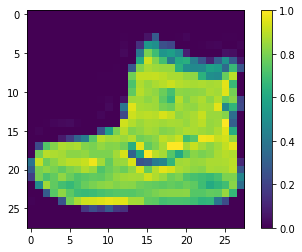

In [12]:
# Exploring the data
print(train_images.shape)
print(len(train_labels))

print(test_images.shape)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

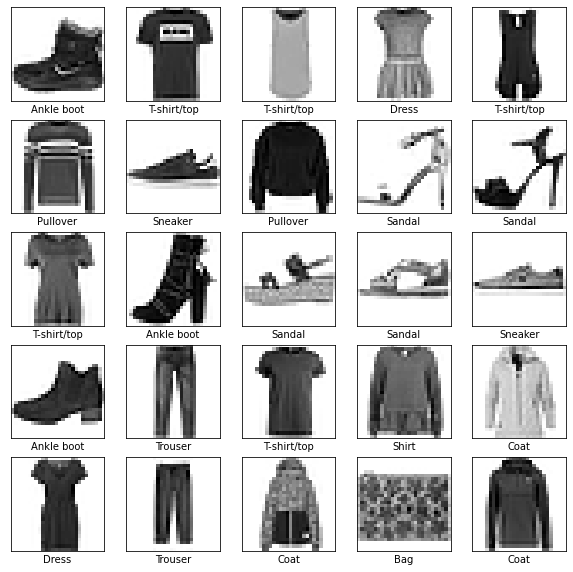

In [5]:
# preprocess the data to be fed into our NN
# Pixel values need to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# verify by displaying images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# Time to define our NN model

model = tf.keras.Sequential([
    # Flatten the 2d matrix into one long vector
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # This dense layer contains parameters that will be trained
    tf.keras.layers.Dense(128, activation='relu'),
    # This final dense layer has one node for each label
    tf.keras.layers.Dense(10)
])

# Compile our model
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

# Loss func sees how accurate the model is during training.
# optimizer defines how the model is updated each epoch given the loss
# Metrics, keeps track of the accuracy as the model trains

In [8]:
# Time to train the model
model.fit(train_images, train_labels, epochs=10)


2021-09-19 20:30:02.349368: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4965 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [9]:
# assess the model using the testing set

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n Test Accuracy:', test_acc)

# Accuracy on test set is slightly lower than on training set
# This means we have overfitted
# We have over analysed the training set

313/313 - 1s - loss: 0.3227 - accuracy: 0.8865

 Test Accuracy: 0.8865000009536743


In [13]:
# We can use the model to make predictions and visualise some results

# Make a new model, combining the old model with a softmax layer (makes nice probabilities)
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Output an array containing probability each image is each label
predictions = prob_model.predict(test_images)

# Print the most liekly category for the first image (ankle boot)
print(np.argmax(predictions[0]))


9


In [14]:
# Some useful functions for displaying the results

# Function for plotting image
def plot_image(i, predictions_array, true_label, img):
    # Get label and image from reference i
    true_label, img = true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # print image
    plt.imshow(img, cmap=plt.cm.binary)

    # Get label
    predicted_label = np.argmax(predictions_array)

    # Blue writing if correct and red if incorrect
    if predicted_label == true_label:
        colour = 'blue'
    else:
        colour = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=colour)


# Function for plotting bar chart of predictions
def plot_value_array(i, predictions_array, true_labels):

    # Get true label from reference
    true_label = true_labels[i]

    # Set up the axes
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    # Define bar chart
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])

    predicted_label = np.argmax(predictions_array)

    # Set colour of predicted bar to red and true bar to blue
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

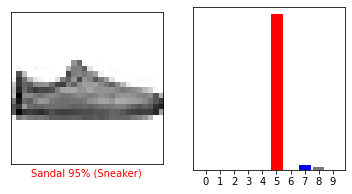

In [19]:
# Choose a ref (i) and plot the image and the results
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

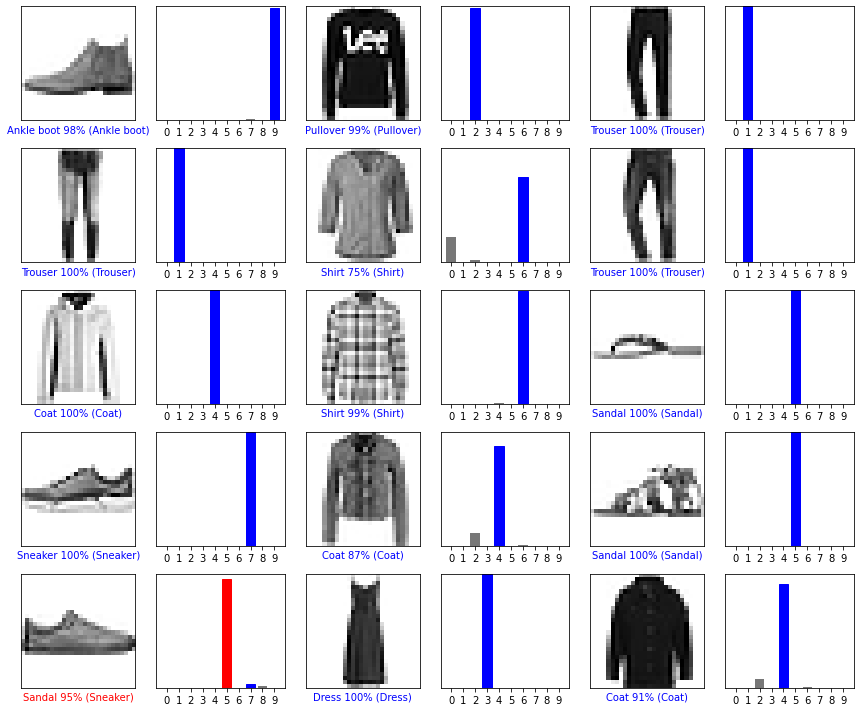

In [20]:
# Lets plot several images and results to see how the model has don

num_rows = 5
num_cols = 3

num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):

    # Plot image
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

    # Plot predictions
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[8.4640124e-05 1.9390609e-11 9.8682457e-01 1.0981872e-08 8.2246047e-03
  2.9519234e-12 4.8659719e-03 3.3331876e-18 1.6656156e-07 9.4885292e-17]]


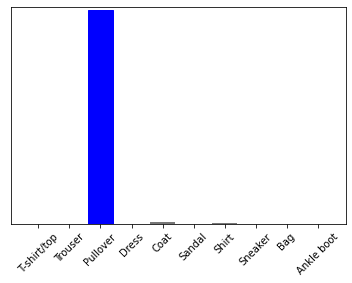

In [23]:
# Use the model to make individual predictions
img_selector = 1

img = test_images[1]

print(img.shape)

# To go into the model we need a tensor (3d)
img = np.expand_dims(img, 0)
print(img.shape)


predictions_single = prob_model.predict(img)
print(predictions_single)
# Returns a list of lists thats why we need a reference in the func call below

plot_value_array(img_selector, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()